In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



from scipy import stats
from scipy.stats import zscore


In [6]:
#grab my vechile dataset

#https://levelup.gitconnected.com/cozy-up-with-your-data-6aedfb651172

df =  pd.read_csv('vehicle_reduced.csv'
                     ,sep=','
                    ,dtype={'id': object}
                     )

In [9]:
df.drop(['Unnamed: 0','county'],axis=1,inplace=True)#mistake on my export


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  object 
 1   region        539759 non-null  object 
 2   price         539759 non-null  int64  
 3   year          538772 non-null  float64
 4   manufacturer  516175 non-null  object 
 5   model         531746 non-null  object 
 6   condition     303707 non-null  object 
 7   cylinders     321264 non-null  object 
 8   fuel          536366 non-null  object 
 9   odometer      440783 non-null  float64
 10  title_status  536819 non-null  object 
 11  transmission  535786 non-null  object 
 12  drive         383987 non-null  object 
 13  size          168550 non-null  object 
 14  type          392290 non-null  object 
 15  paint_color   365520 non-null  object 
 16  state         539759 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

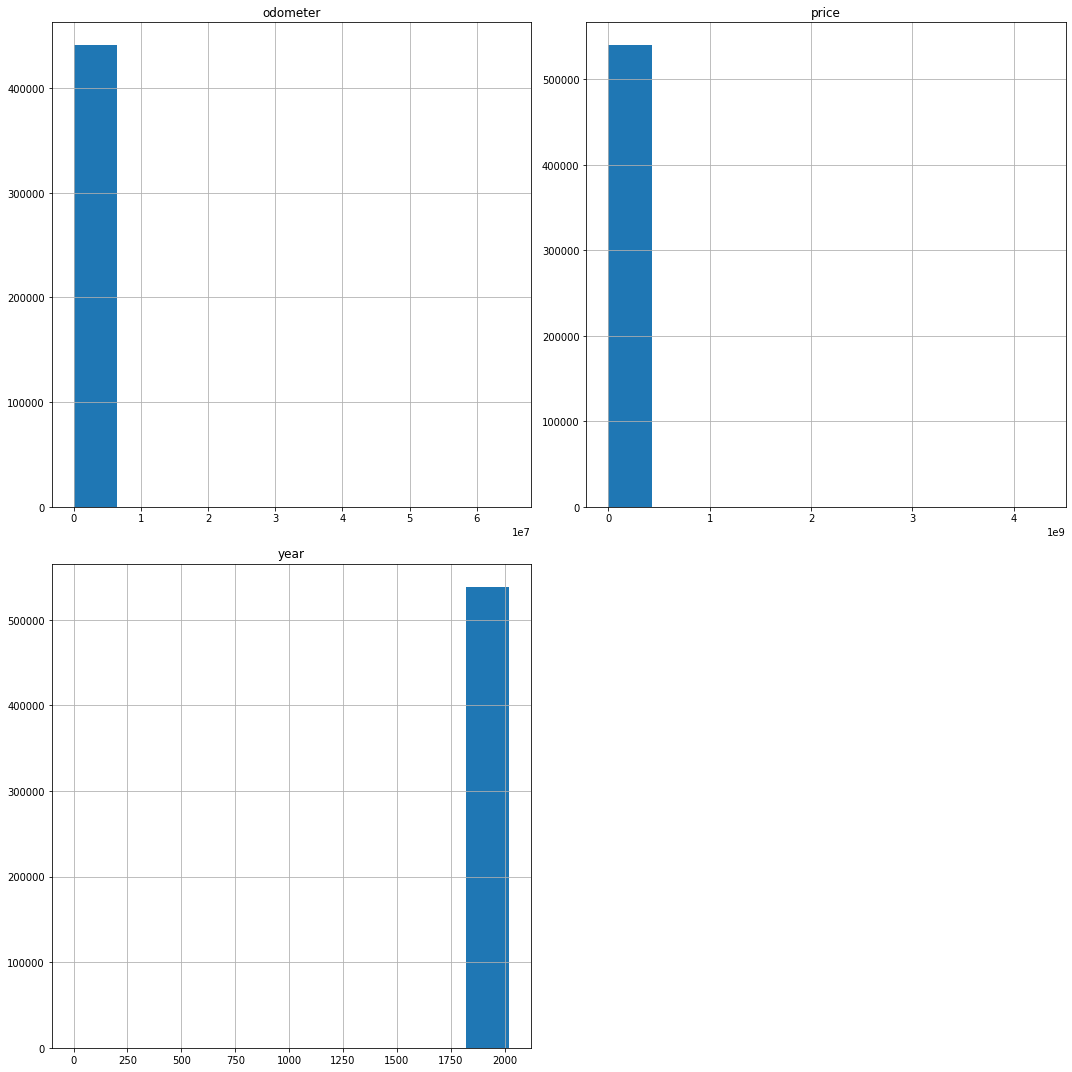

In [11]:
df.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [12]:
df.describe()


,price,year,odometer
count,5.397590e+05,538772.000000,4.407830e+05
mean,1.954214e+05,2009.830982,1.008008e+05
std,2.208252e+07,9.161334,1.767058e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,4.400000e+03,2007.000000,4.703850e+04
50%,9.500000e+03,2012.000000,9.330000e+04
75%,1.792600e+04,2015.000000,1.377550e+05
max,4.294967e+09,2021.000000,6.480922e+07


In [13]:
df.duplicated().sum()


0

In [14]:
isnull = df.isna().sum()/len(df)
isnull[isnull > 0].sort_values()

year            0.001829
title_status    0.005447
fuel            0.006286
transmission    0.007361
model           0.014846
manufacturer    0.043694
odometer        0.183371
type            0.273213
drive           0.288595
paint_color     0.322809
cylinders       0.404801
condition       0.437329
size            0.687731
dtype: float64

In [24]:
df['odometer'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Thurstan\.conda\envs\pythonlearningx64\lib\site-packages\matplotlib\cbook\__init__.py

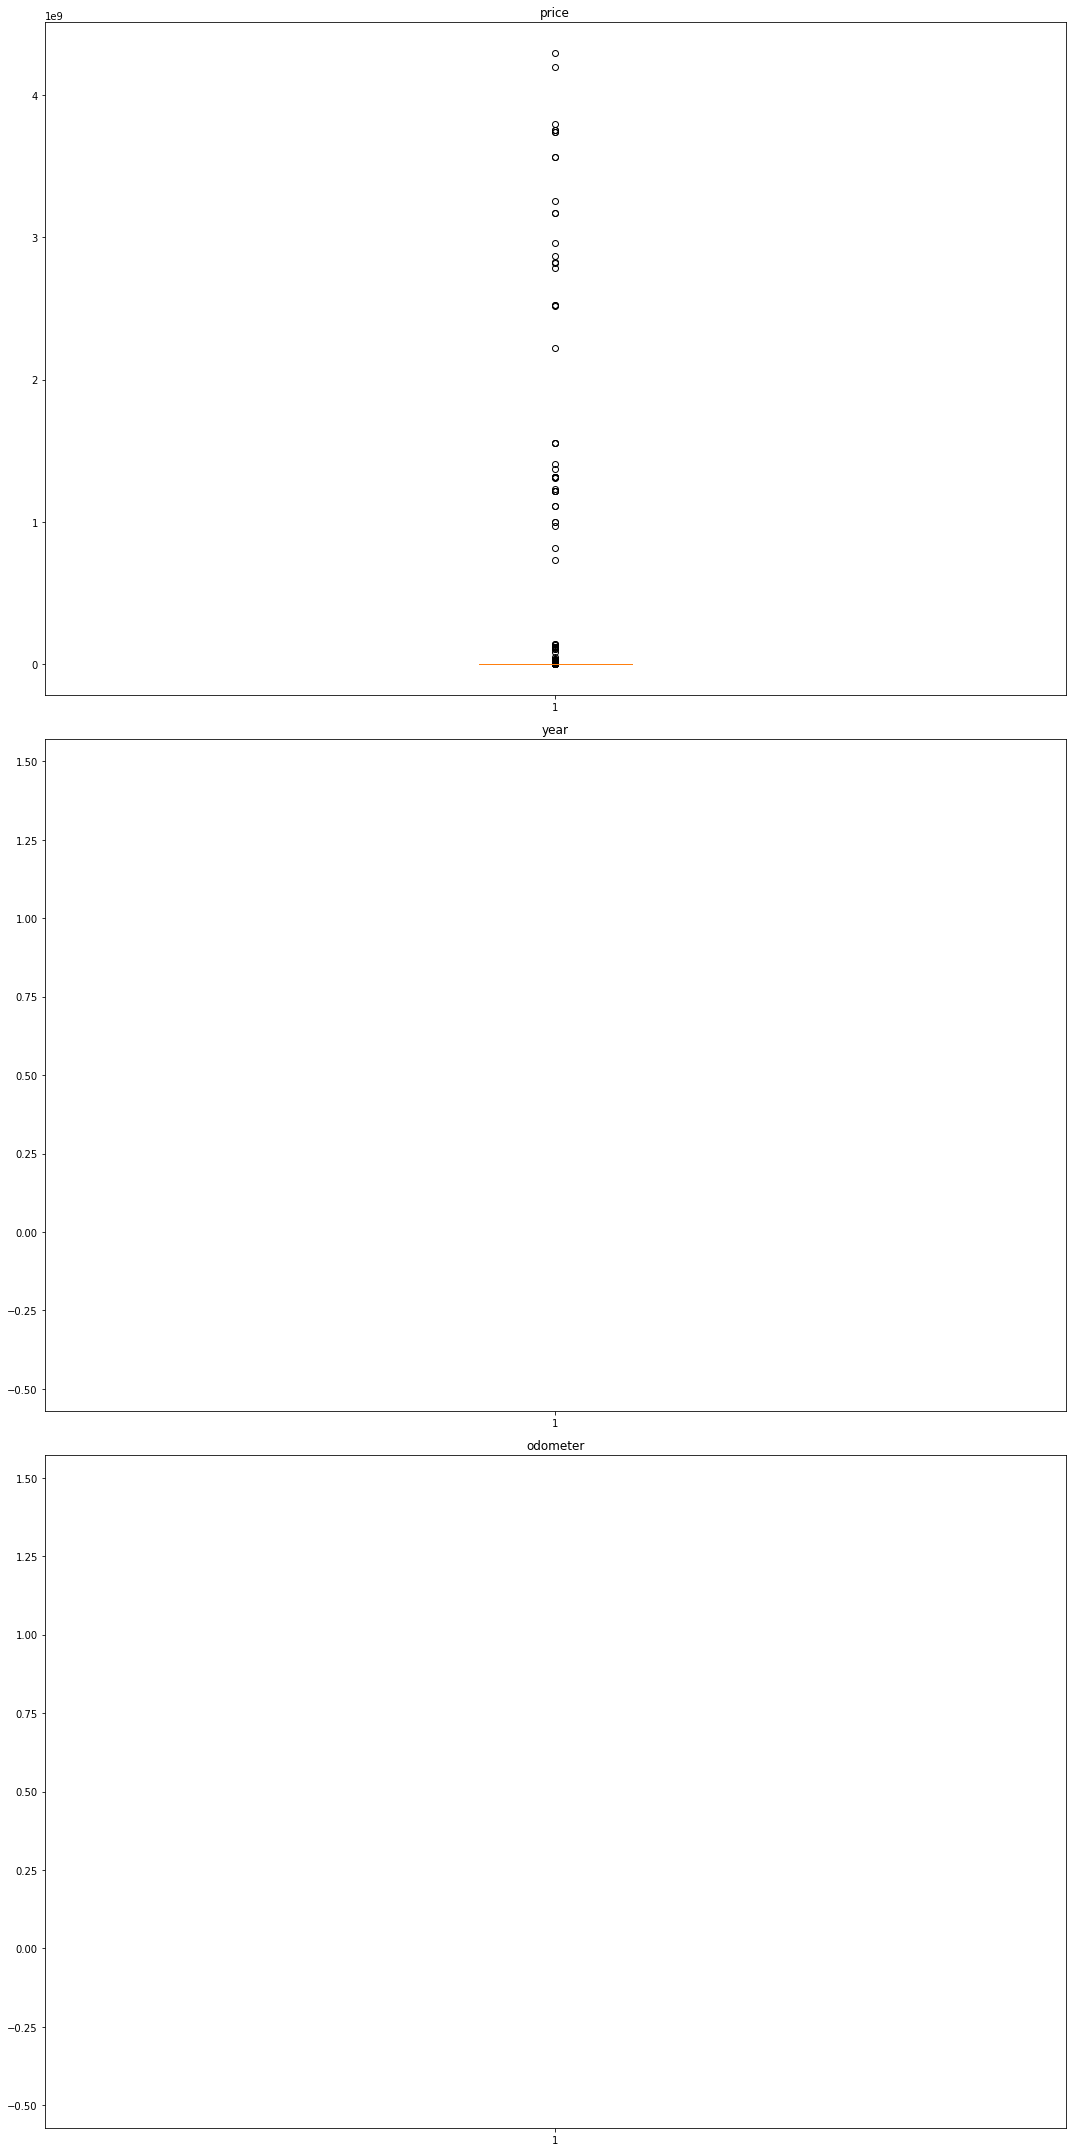

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_labels = df.select_dtypes(include=numerics).columns
# numeric_labels


# continuous_labels = list(continuous.columns)
i = 1
plt.figure(figsize=(15,30))
for var in numeric_labels: #plotting boxplot for each variable
   plt.subplot(3,1,i)
   plt.boxplot(df[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_labels = list(df.select_dtypes(include=numerics).columns)
display(numeric_labels)

print((round(len(numeric_labels),0)))

# continuous_labels = list(continuous.columns)
i = 1
plt.figure(figsize=(15,30))
for var in numeric_labels:
    print(round(len(numeric_labels),0)/3+3,4,i)
    i+=1


['price', 'year', 'odometer']

3
4.0 4 1
4.0 4 2
4.0 4 3


<Figure size 1080x2160 with 0 Axes>

In [27]:
df.corr()


,price,year,odometer
price,1.000000,-0.006680,0.000349
year,-0.006680,1.000000,-0.155243
odometer,0.000349,-0.155243,1.000000
